# Data Discovery

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Data Understanding

In [4]:
# Set month
month = 'August'

# Set index
imonth = '08'

https://opentransportdata.swiss/de/dataset/istdaten

In [5]:
# Clean data contains every "stop" for a month for all swiss railways
data_all = pd.read_pickle('data/istdaten/{}/data_clean_2019{}.pkl'.format(month, imonth))

In [6]:
# Look at data integrity and size
data_all.count()

BETRIEBSTAG            2815013
FAHRT_BEZEICHNER       2815013
BETREIBER_ABK          2815013
PRODUKT_ID             2815013
LINIEN_ID              2815013
LINIEN_TEXT            2815005
VERKEHRSMITTEL_TEXT    2815005
ZUSATZFAHRT_TF         2815013
FAELLT_AUS_TF          2815013
HALTESTELLEN_NAME      2815013
ANKUNFTSZEIT           2561757
AN_PROGNOSE            2426314
AN_PROGNOSE_STATUS     2815013
ABFAHRTSZEIT           2561594
AB_PROGNOSE            2426184
AB_PROGNOSE_STATUS     2815013
DURCHFAHRT_TF          2815013
dtype: int64

In [7]:
# Produkt_ID seems to be containing information about the type of public transport
data_all['PRODUKT_ID'].value_counts()

Zug    2815013
Name: PRODUKT_ID, dtype: int64

In [8]:
data_all.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
258,01.08.2019,80:L7____:87875:000,SBB,Zug,87875,S6,S,False,False,Basel Bad Bf,01.08.2019 01:14,NaN,UNBEKANNT,NaN,NaN,PROGNOSE,False
427,01.08.2019,85:11:100:001,SBB,Zug,100,ICE,ICE,False,False,Basel SBB,NaN,NaN,PROGNOSE,01.08.2019 19:13,01.08.2019 19:15:06,REAL,False
428,01.08.2019,85:11:100:001,SBB,Zug,100,ICE,ICE,False,False,Basel Bad Bf,01.08.2019 19:19,01.08.2019 19:20:26,PROGNOSE,01.08.2019 19:23,01.08.2019 19:23:24,PROGNOSE,False
429,01.08.2019,85:11:1007:001,SBB,Zug,1007,IC4,IC,False,False,Schaffhausen,NaN,NaN,PROGNOSE,01.08.2019 05:47,01.08.2019 05:47:42,REAL,False
430,01.08.2019,85:11:1007:001,SBB,Zug,1007,IC4,IC,False,False,Zürich HB,01.08.2019 06:23,01.08.2019 06:24:46,REAL,NaN,NaN,PROGNOSE,False


In [9]:
data_all['LINIEN_ID'].unique().shape

(15488,)

In [10]:
def plot_value_counts_pie_chart(df_col, title_upperpart):
    """
    function takes a column of a dataframe as input and makes a pie chart out of it,
    based on the value_counts function. title_upperpart is also provided to give the 
    plto a title
    """
    plt.figure()
    df_size = len(df_col)
    print(df_size)
    y=df_col.value_counts().values
    for item in y:
        print(item/df_size)
    df_col.value_counts().plot(
        kind='pie',
        explode=explode,
        y=df_col.value_counts().values,
        legend=False,
        autopct='%1.1f%%',
        startangle=0,
        shadow=False,
        label='',
        title=title_upperpart + ', \n total: ' + str(df_size) +
        ' stops (13th September 2019)',
        figsize=(10, 10))

2815013
1.0


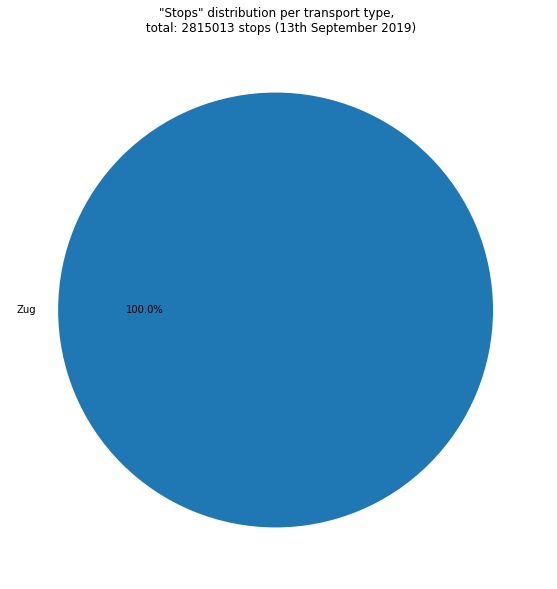

In [11]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_all['PRODUKT_ID'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_all['PRODUKT_ID'],
                            '"Stops" distribution per transport type')

In [12]:
# Keep only trains data (Zug is train in german)
data_train = data_all[data_all['PRODUKT_ID'] == 'Zug']

In [13]:
pd.unique(data_train['BETREIBER_ABK'])

array(['SBB', 'BLS-bls', 'THURBO'], dtype=object)

2815013
0.6911342860583592
0.16536264663786632
0.14350306730377443


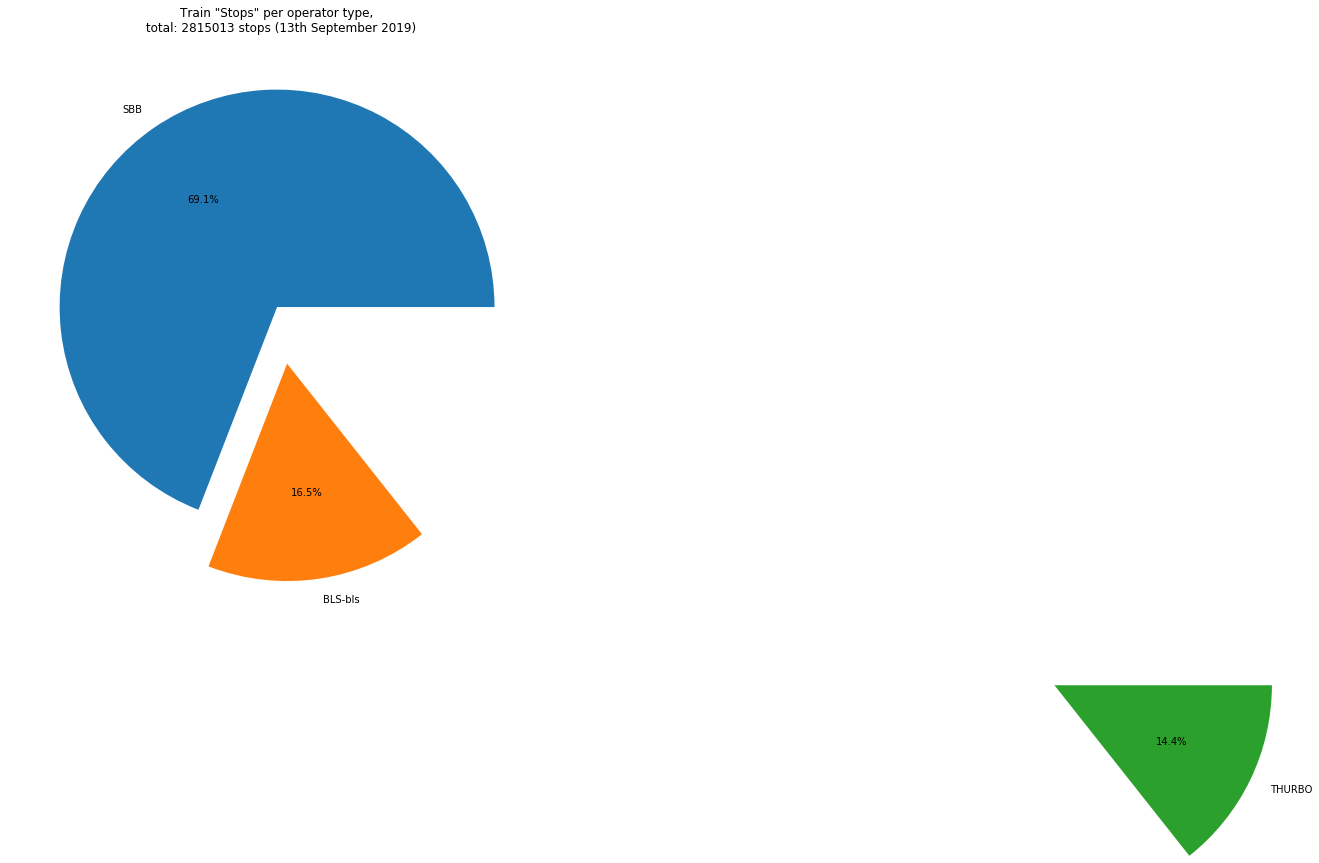

In [16]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_train['BETREIBER_ABK'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_train['BETREIBER_ABK'],
                            'Train "Stops" per operator type')

In [17]:
# Keep only trains operated by SBB
data_train_SBB = data_train[data_train['BETREIBER_ABK'] == 'SBB']

1945552
0.6960189190522793
0.0878727476829198
0.0810063159452947
0.0696090364071482
0.04601881625369047
0.00468144773308552
0.003937699943255179
0.0034524906042089853
0.002917937942547925
0.0018812141746918098
0.0008881798070676086
0.0006579109681982286
0.0005355806475488704
0.0003274135052673997
0.00013980608074212357
2.621364013914817e-05
1.4905795373241116e-05
4.111943551238928e-06
2.055971775619464e-06
1.5419788317145983e-06
1.027985887809732e-06
5.13992943904866e-07


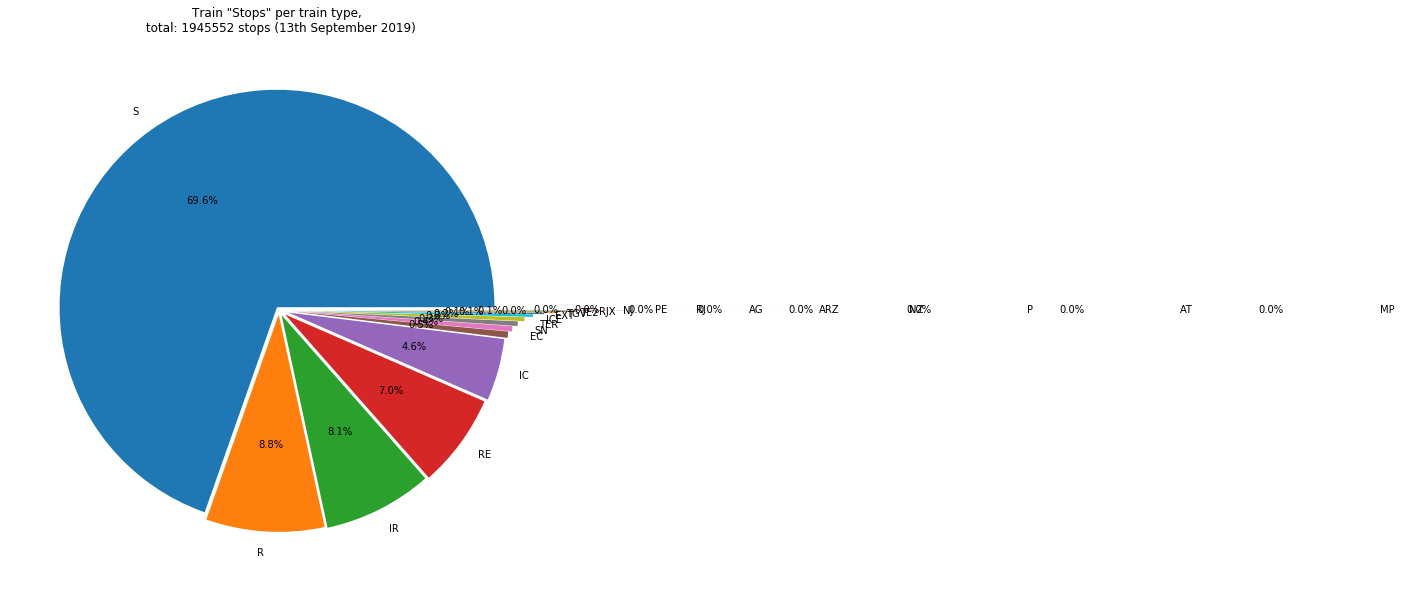

In [18]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_train_SBB['VERKEHRSMITTEL_TEXT'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_train_SBB['VERKEHRSMITTEL_TEXT'],
                            'Train "Stops" per train type')

In [19]:
# Take a look at the data, to understand its size
data_train_SBB.describe(include='object')

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
count,1945552,1945552,1945552,1945552,1945552,1945544,1945544,1945552,1771818,1666076,1945552,1771728,1666028,1945552,1945552
unique,31,9571,1,1,12334,87,22,663,41638,1171590,3,41684,1157874,3,2
top,23.08.2019,85:11:24289:001,SBB,Zug,20423,R,S,Zürich HB,23.08.2019 17:24,24.08.2019 07:27:26,REAL,25.08.2019 17:39,05.08.2019 08:32:06,REAL,False
freq,65437,961,1945552,1945552,839,170961,1354141,60880,79,9,1590992,76,15,1594891,1945446


In [20]:
# Example of a route
data_train_SBB.loc[data_train_SBB['FAHRT_BEZEICHNER'] == '85:11:24289:001'].head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
38739,01.08.2019,85:11:24289:001,SBB,Zug,24289,S2,S,False,False,Vallorbe,NaN,NaN,PROGNOSE,01.08.2019 22:10,01.08.2019 22:19:42,REAL,False
38740,01.08.2019,85:11:24289:001,SBB,Zug,24289,S2,S,False,False,Le Day,01.08.2019 22:14,01.08.2019 22:22:38,REAL,01.08.2019 22:14,01.08.2019 22:23:40,REAL,False
38741,01.08.2019,85:11:24289:001,SBB,Zug,24289,S2,S,False,False,Bretonnières,01.08.2019 22:20,01.08.2019 22:29:35,REAL,01.08.2019 22:20,01.08.2019 22:30:55,REAL,False
38742,01.08.2019,85:11:24289:001,SBB,Zug,24289,S2,S,False,False,Croy-Romainmôtier,01.08.2019 22:22,01.08.2019 22:31:50,REAL,01.08.2019 22:22,01.08.2019 22:32:23,REAL,False
38743,01.08.2019,85:11:24289:001,SBB,Zug,24289,S2,S,False,False,Arnex,01.08.2019 22:27,01.08.2019 22:33:23,REAL,01.08.2019 22:27,01.08.2019 22:39:56,REAL,False


In [21]:
from geopy.geocoders import Nominatim

In [134]:
geolocator = Nominatim(user_agent="https://ganagno.github.io/",country_bias='Schweiz')

In [141]:
origin = geolocator.geocode('Schweiz')
print(origin)

Schweiz/Suisse/Svizzera/Svizra


In [151]:
location = geolocator.geocode('Le Day, Schweiz/Suisse/Svizzera/Svizra')
print(location)

Le Day, District du Jura-Nord vaudois, Vaud, 1337, Schweiz/Suisse/Svizzera/Svizra


In [142]:
spots = np.unique(data_train_SBB.loc[data_train_SBB['FAHRT_BEZEICHNER'] == '85:11:24289:001']['HALTESTELLEN_NAME'].values)

In [143]:
spots

array(['Aigle', 'Arnex', 'Bex', 'Bretonnières', 'Burier', 'Bussigny',
       'Clarens', 'Cossonay-Penthalaz', 'Croy-Romainmôtier', 'Cully',
       'Epesses', 'La Sarraz', 'La Tour-de-Peilz', 'Lausanne', 'Le Day',
       'Lutry', 'Montreux', 'Prilly-Malley', 'Pully', 'Renens VD',
       'Rivaz', 'Roche VD', 'St-Maurice', 'St-Saphorin', 'Territet',
       'Vallorbe', 'Vevey', 'Veytaux-Chillon', 'Villeneuve',
       'Villette VD', 'Vufflens-la-Ville'], dtype=object)

In [160]:
locations=[]

In [161]:
for spot in spots:
    location = geolocator.geocode('{}, Schweiz/Suisse/Svizzera/Svizra'.format(spot))
    print(location)
    locations.append(location)

Aigle, District d'Aigle, Vaud, 1860, Schweiz/Suisse/Svizzera/Svizra
Arnex, District du Jura-Nord vaudois, Vaud, 1321, Schweiz/Suisse/Svizzera/Svizra
Bex, District d'Aigle, Vaud, 1880, Schweiz/Suisse/Svizzera/Svizra
Bretonnières, District du Jura-Nord vaudois, Vaud, 1329, Schweiz/Suisse/Svizzera/Svizra
Burier, La Tour-de-Peilz, District de la Riviera-Pays-d’Enhaut, Vaud, 1814, Schweiz/Suisse/Svizzera/Svizra
Bussigny-sur-Oron, Bussigny, District de Lavaux-Oron, Vaud, 1608, Schweiz/Suisse/Svizzera/Svizra
Clarens, District de la Riviera-Pays-d’Enhaut, Vaud, 1815, Schweiz/Suisse/Svizzera/Svizra
Cossonay-Penthalaz, Route de Gollion, Penthalaz, District du Gros-de-Vaud, Vaud, 1305, Schweiz/Suisse/Svizzera/Svizra
Croy-Romainmôtier, 11, La Riettaz, Romainmôtier-Envy, District du Jura-Nord vaudois, Vaud, 1323, Schweiz/Suisse/Svizzera/Svizra
Cully, Bourg-en-Lavaux, District de Lavaux-Oron, Vaud, 1096, Schweiz/Suisse/Svizzera/Svizra
Epesses, District de Lavaux-Oron, Vaud, 1098, Schweiz/Suisse/Sviz

In [163]:
df = pd.DataFrame()

In [164]:
# intialise data of lists.
data = {
        'latitude':[location.latitude for location in locations],
        'longitude':[location.longitude for location in locations]
       }

In [165]:
df = pd.DataFrame(data)
df

,latitude,longitude
0,46.317901,6.968893
1,46.694159,6.518752
2,46.251378,7.012388
3,46.712238,6.473491
4,46.449612,6.881897
5,46.569770,6.862843
6,46.441112,6.893060
7,46.605819,6.523085
8,46.696692,6.478088
9,46.500736,6.731724


In [166]:
import folium 
map1 = folium.Map(
    location=[origin.latitude,origin.longitude],
    tiles='cartodbpositron',
    zoom_start=7.5,
)
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1